<a href="https://colab.research.google.com/github/tusharbhave26/Simplilearn-Capstone-project---Healthcare/blob/main/Capstone_Project_Healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. 
- The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
- Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### 1. Data Exploration

- Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI

- Visually explore these variables using histograms. Treat the missing values accordingly.

- There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

#### 1.1 Import the necessary library

numpy, pandas, matplotlib, seaborn etc.

all the other library we'll import as required

In [ ]:
# import the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### 1.2 Importing the healthcare datasets

In [ ]:
from google.colab import files
upload = files.upload()

Saving health care diabetes.csv to health care diabetes.csv


In [ ]:
df_diabetes = pd.read_csv("health care diabetes.csv")

In [ ]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 1.3 Some basic info about the dataset

In [ ]:
#Check the shape of the df
df_diabetes.shape

(768, 9)

- So we have a diabetes dataset which have 768 rows and 9 columns

In [ ]:
# Some basic info
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


So now from basic info we can see that we have 9 columns out of which 
- 7 columns are integers i.e. Pregnancies, Glucose, BP, Skinthickness, Insuling, Age, outcome
- 2 columns are float i.e. BMI(body mass index), DiabetesPedigreeFunction(a Function which calculates the likelihood of diabetes based on family history)
- None of the columns have null values as shown
- it seems that outcome is the predictor variable which show if the person have diabetes or not
  - 0 indicates non-Diabetic
  - 1 indicates Diabetic

#### 1.3 Descriptive analysis of the dataset

Lets see some basic descriptive analysis on the dataset like the mean, median etc.

In [ ]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


above we see the basic statistics about the diabetes dataframe
some point to note
- For Pregnancy we have min of 0 and max of 17 with a mean of 3 
- one thing to note is that for many of the predictors (Glucose, BP, Skinthickness, Insulin, BMI) we have min, reading of 0 which is not possible, so it is most like be the missing values which needs to be imputes based on the distribution of these predictors
- For age values ranges from 11-81 with a means of 33 which is somewhat normal distributes

#### 1.4 Lets check the values count of the outcome 

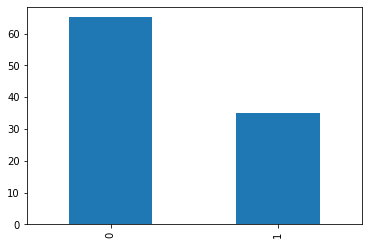

In [ ]:
round(df_diabetes['Outcome'].value_counts(normalize=True)*100,2).plot(kind='bar', )
plt.title("Proportion of the outcome")
plt.show()

So we have about 65% non-diabetic and 35% diabetic

Now we have some idea about the dataset

Now lets deal with the missing values. Although in isna we dont have any missing values. we saw above that we have lot of zero values in many of the predictors (Glucose, BP, Skinthickness, Insulin, BMI) which is not possible. So we have to treat these zero as missing values and impute them in some manner

- Before dealing with them lets check the distribution of these variables

#### 1.5 Missing values 

##### 1.5.1 Let's check the distribution of the variable

Before we impute these zero values it is abvisable to see the distribution of the missing values of see most efficient strategy i.e. mean, median to deal with the missing values

- if the distribution of the predictors it skewed(right or left) it is advisable to impute it with median
- if the distribition of the predictors it normal then we can impute it with mean

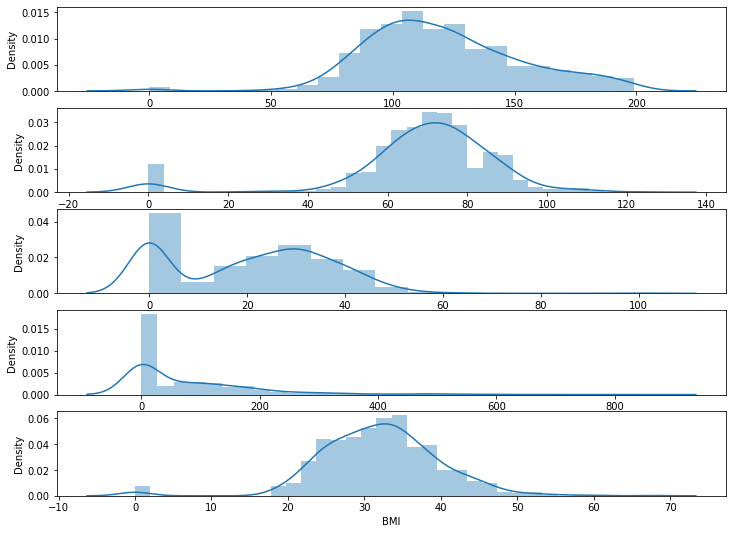

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(5,1,1); sns.distplot(df_diabetes['Glucose'])
plt.subplot(5,1,2); sns.distplot(df_diabetes['BloodPressure'])
plt.subplot(5,1,3); sns.distplot(df_diabetes['SkinThickness'])
plt.subplot(5,1,4); sns.distplot(df_diabetes['Insulin'])
plt.subplot(5,1,5); sns.distplot(df_diabetes['BMI'])
plt.show()

So from the above frequency plot we know that Glucose, BP, skinthickness and BMI are somewhat normally distributes 
and Insulin is Right skewed so for insuling we can impute its values with median and rest we can impute with means

##### 1.5.2 Number of Missing values

In [ ]:
# Lets first make a copy of the original dataset

df_diabetes1 = df_diabetes.copy()

In [ ]:
df_diabetes1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(round(len(df_diabetes1[df_diabetes1['Glucose']==0])/df_diabetes1.shape[0]*100,2))
print(round(len(df_diabetes1[df_diabetes1['BloodPressure']==0])/df_diabetes1.shape[0]*100,2))
print(round(len(df_diabetes1[df_diabetes1['SkinThickness']==0])/df_diabetes1.shape[0]*100,2))
print(round(len(df_diabetes1[df_diabetes1['Insulin']==0])/df_diabetes1.shape[0]*100,2))
print(round(len(df_diabetes1[df_diabetes1['BMI']==0])/df_diabetes1.shape[0]*100,2))

0.65
4.56
29.56
48.7
1.43


Skinthickness and insuling have most number of missing values

##### 1.5.3 Let's try to impute the missing values 

Lets try to impute the zero values of Glucose columns with means using replace function

In [ ]:
df_diabetes1['Glucose'] = df_diabetes1['Glucose'].map(lambda x : df_diabetes1.Glucose.mean() if x == 0 else x)

In [ ]:
df_diabetes1[df_diabetes1['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
df_diabetes1['SkinThickness'] = df_diabetes1['SkinThickness'].map(lambda x : df_diabetes1.SkinThickness.mean() if x == 0 else x)
df_diabetes1['BloodPressure'] = df_diabetes1['BloodPressure'].map(lambda x : df_diabetes1.BloodPressure.mean() if x == 0 else x)
df_diabetes1['BMI'] = df_diabetes1['BMI'].map(lambda x : df_diabetes1.BMI.mean() if x == 0 else x)
df_diabetes1['Insulin'] = df_diabetes1['Insulin'].map(lambda x : df_diabetes1.Insulin.median() if x == 0 else x)

##### Let's Check the distribution after imputation


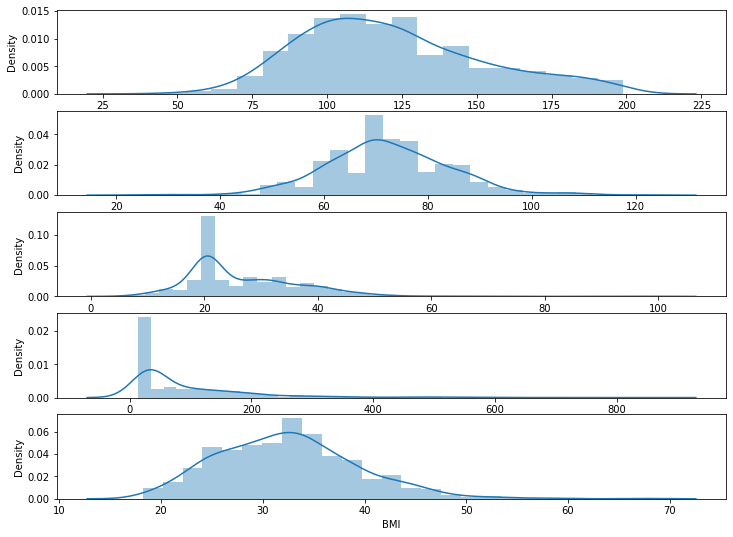

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(5,1,1); sns.distplot(df_diabetes1['Glucose'])
plt.subplot(5,1,2); sns.distplot(df_diabetes1['BloodPressure'])
plt.subplot(5,1,3); sns.distplot(df_diabetes1['SkinThickness'])
plt.subplot(5,1,4); sns.distplot(df_diabetes1['Insulin'])
plt.subplot(5,1,5); sns.distplot(df_diabetes1['BMI'])
plt.show()

#### 1.6 Count plot for the predictor varibles

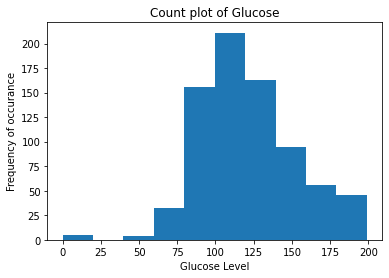

In [ ]:
plt.hist(df_diabetes['Glucose'])
plt.xlabel("Glucose Level")
plt.ylabel("Frequency of occurance")
plt.title("Count plot of Glucose")
plt.show()

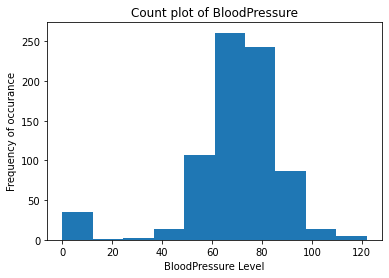

In [ ]:
plt.hist(df_diabetes['BloodPressure'])
plt.xlabel("BloodPressure Level")
plt.ylabel("Frequency of occurance")
plt.title("Count plot of BloodPressure")
plt.show()

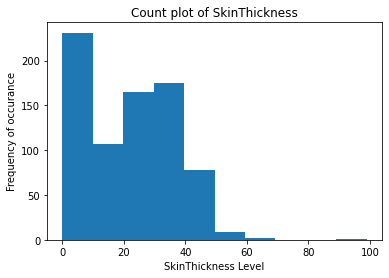

In [ ]:
plt.hist(df_diabetes['SkinThickness'])
plt.xlabel("SkinThickness Level")
plt.ylabel("Frequency of occurance")
plt.title("Count plot of SkinThickness")
plt.show()

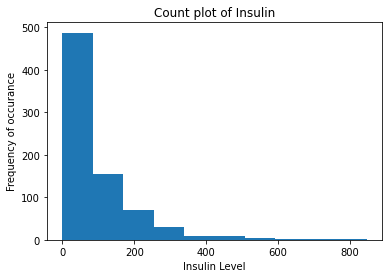

In [ ]:
plt.hist(df_diabetes['Insulin'])
plt.xlabel("Insulin Level")
plt.ylabel("Frequency of occurance")
plt.title("Count plot of Insulin")
plt.show()

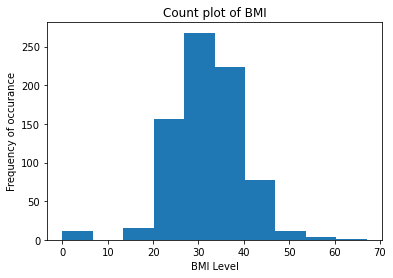

In [ ]:
plt.hist(df_diabetes['BMI'])
plt.xlabel("BMI Level")
plt.ylabel("Frequency of occurance")
plt.title("Count plot of BMI")
plt.show()

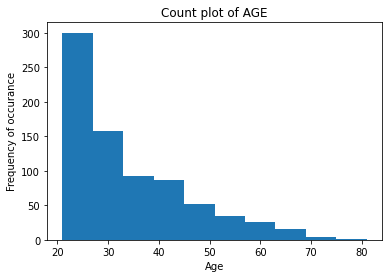

In [ ]:
plt.hist(df_diabetes['Age'])
plt.xlabel("Age")
plt.ylabel("Frequency of occurance")
plt.title("Count plot of AGE")
plt.show()

### 2. EDA

#### 2.1 plotting the outcome of the variable

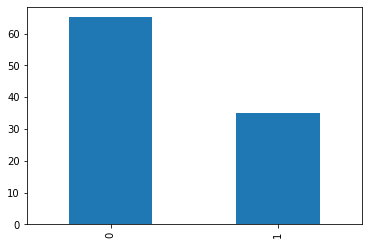

In [ ]:
round(df_diabetes['Outcome'].value_counts(normalize=True)*100,2).plot(kind='bar' )
plt.show()

So we have uneven values of the outcome where non diabetic are represented 65% of the time
and diabetic are 35% of the data.

- So here we have an imbalanced dataset where non-diabetic are represented more than the diabetic.
This could pose the problem while trying to classify those people who have diabetic.

- This results in models that have poor predictive performance, specifically for the minority class i.e. Diabetic

- here we are talking about the correct prediction of diabetic person so the correct prediction of the minority class is more important i.e. it is important that we classify all the diabetic even if some non-diabetic could also be classify as diabetic not the other way around

- Some of the approaches to deal with this sort of problem could be 
  - 1. Try to see the precision and recall values with the original data
  - 2. Do Stratified sampling so the equal number of classes get represented in train/test split
  - 3. if Nothing work we can alaways use Oversampling/Undersampling algo like SMOTE to better represent the data

#### 2.2 Create the Scatter plot between the variable

For this let's use seaborn pairplot method as it easy as compared to individually plot 2 variables

In [ ]:
sns.pairplot(data=df_diabetes1, hue = 'Outcome')
plt.show()

#### 2.3 Correlation analysis

Here we are doing the correlation analysis to try to find the correlation between the predictors to see if multicollinearity occurs and also see the relationship between diffrent predictors

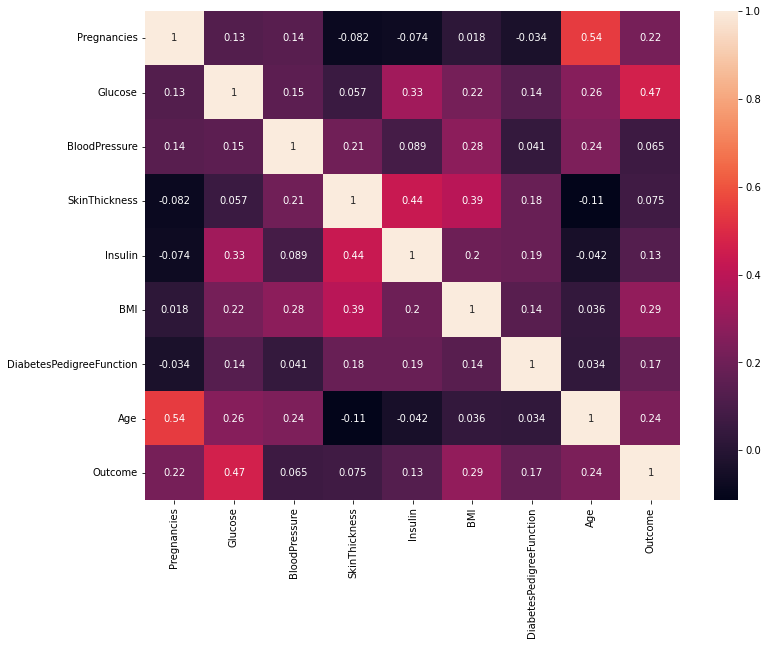

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df_diabetes.corr(), annot=True)
plt.show()

As Such we do not see Strong correlation between any predictor variable
when look form the outcome point of view there are some what positive corr with Glucose level, BMI, Age, Preg in that order

So now we can move onto the model building part

### 3. Model Building

#### 3.1 Data Preprocessing

Before we move on to the model building and comparing various model with KNN, we need to preprocess the data

First do the test train split 



In [ ]:
X = df_diabetes1.iloc[:,:-1].values
y = df_diabetes1.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state= 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


Lets do the scaling of the predictor variable

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

#### 3.2 Applying the KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train_sc, y_train)
knn_pred = knn_model.predict(X_test_sc)

In [ ]:
from sklearn import metrics
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, knn_pred))
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(X_test_sc)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

- Here as we see that the precision for both positive and negetive is okay i.e. how many correctly predicted turned out to be positive
- but when we look at the recall values which is how many actual positive (on both diabetic and non diabetic) we are able to predict correctly. Here recall values is very low esp. for the diabetic class. Out of the total diabetic we are able to predict only 46% of the time
- Also the AOC score which is how much better we are able to differentiate between diabetic and non-diabetic class is 79% which is okay

Now lets train other classifier to see if the position improve

#### 3.3 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(X_train_sc, y_train)
y_log_pred = clf_log.predict(X_test_sc)

In [ ]:
print("Logistics Regression Model Validation ==>\n")
print("Accuracy Score of Logistics Model::")
print(metrics.accuracy_score(y_test,y_log_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_log_pred),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_log_pred))
print("\n","ROC Curve")
log_prob=clf_log.predict_proba(X_test_sc)
log_prob1=log_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,log_prob1)
roc_auc_log=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Logistics Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_log)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

its performance is almost same as that of the basic KNN classifier . Some small improvement are shown
- accuracy has only improved by about 0.6 percent point
- Precision has decrease for positive class by about 5% point
- but Good news is that the recall value have increase as compared to the basic KNN model by 15% point which is a good
- Also the Ability to differentiate has only change by about 2%

#### 3.4 Support Vector Machine

In [ ]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='rbf',random_state=42,probability=True)
clf_svc.fit(X_train_sc, y_train)
y_pred_svc = clf_svc.predict(X_test_sc)

In [ ]:
print("Support Vector Machine Model Validation ==>\n")
print("Accuracy Score of SVM Model::")
print(metrics.accuracy_score(y_test,y_pred_svc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_pred_svc),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_svc))
print("\n","ROC Curve")
svc_prob=clf_svc.predict_proba(X_test_sc)
svc_prob1=svc_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Support Vector Machine")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

Not much has change with the using SVM model some parameter like accracy has increase but not much improvement

Lets see the Random Forest model 

#### 3.5 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=1000,random_state = 42)
clf_forest.fit(X_train_sc, y_train)
y_pred_for = clf_forest.predict(X_test_sc)

In [ ]:
print("Random Forest Model Validation ==>\n")
print("Accuracy Score of Random Forest Model::")
print(metrics.accuracy_score(y_test,y_pred_for))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_pred_for),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_for))
print("\n","ROC Curve")
for_prob=clf_forest.predict_proba(X_test_sc)
for_prob1=for_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,for_prob1)
roc_auc_for=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Random Forest")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_for)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

As compared to the Basic KNN model we see following improvement

- Accuracy has increase from 73% to 76% 
- precision 
  - for non-diabetic it is showing much improvement from 72% to 82%
  - but for diabetic it has declined from 69 to 66% which means out of 100 total diabetic that it predict 66 are actually diabetic
- Recall
  - for non-diabetic it is showing the decline from 89% to 80% which means earlier out of total 100 non diabetic it is able to predict 89 correctly but now only 80 are correctly diagnosed as Non-diabetic
  - But Good news is that for diabetic values has increase from 45% to 70% which means earlier out of 100 diabetic KNN model was able to do correct prediction for only 45 person which has now increase to 70 people
- AOC (ROC) score has measly increase from 79% to 81%

#### 3.6 Applying the oversampling techniques to balance the dataset

Earlier we saw that we have an imbalance data i.e. 65% of cases are of non-diabetic class and 35% are for the diabetic class. This is the big reason for not able to correctly predict the diabetic classification as compared to the Non diabetic classification

To solve this we will apply Oversampling techniques like SMOTE (Synthetic minority oversamping technique)

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print("Before Oversampling", counter)
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train_sc,y_train)
counter = Counter(y_train_sm)
print("After Oversampling", counter)

##### 3.6.1 Applying the Logistic regression on Oversampled data

In [ ]:
clf_log_sm = LogisticRegression()
clf_log_sm.fit(X_train_sm, y_train_sm)
y_log_pred = clf_log.predict(X_test_sc)

In [ ]:
print("Logistics Regression Model using smote ==>\n")
print("Accuracy Score of Logistics Model::")
print(metrics.accuracy_score(y_test,y_log_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_log_pred),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_log_pred))
print("\n","ROC Curve")
log_prob=clf_log_sm.predict_proba(X_test_sc)
log_prob1=log_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,log_prob1)
roc_auc_log=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Logistics Regression using smote")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_log)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

Although we see a small decrease in accuracy but the recall values of diabetic has increase from 61 to 70%

##### 3.6.2 Applying SVM on Oversampled data

In [ ]:
from sklearn.svm import SVC

clf_svc_sm = SVC(kernel='rbf',random_state=42,probability=True)
clf_svc_sm.fit(X_train_sm, y_train_sm)
y_pred_svc = clf_svc_sm.predict(X_test_sc)

In [ ]:
print("Support Vector Machine Model on Oversampled data ==>\n")
print("Accuracy Score of SVM Model::")
print(metrics.accuracy_score(y_test,y_pred_svc))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_pred_svc),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_svc))
print("\n","ROC Curve")
svc_prob=clf_svc_sm.predict_proba(X_test_sc)
svc_prob1=svc_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Support Vector Machine with smote")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

##### 3.6.3 Applying Random Forest on Oversampled data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_forest_sm = RandomForestClassifier(n_estimators=1000,random_state = 42)
clf_forest_sm.fit(X_train_sm, y_train_sm)
y_pred_for = clf_forest_sm.predict(X_test_sc)

In [ ]:
print("Random Forest Model Validation using smote ==>\n")
print("Accuracy Score of Random Forest Model using smote::")
print(metrics.accuracy_score(y_test,y_pred_for))
print("\n","Classification Report::")
print(metrics.classification_report(y_test, y_pred_for),'\n')
print("\n", "Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred_for))
print("\n","ROC Curve")
for_prob=clf_forest_sm.predict_proba(X_test_sc)
for_prob1=for_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,for_prob1)
roc_auc_for=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve - Random Forest using smote")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_for)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

AS we can see that with using the oversampled data we are able to incrase the recall values 70% to 80% at the cost of 3% point decrease in the accuracy.

That means that we are able to better identify the diabetic person at the cost of few non-diabetic that could be misclassified as diabetic